<Figure size 1200x800 with 0 Axes>

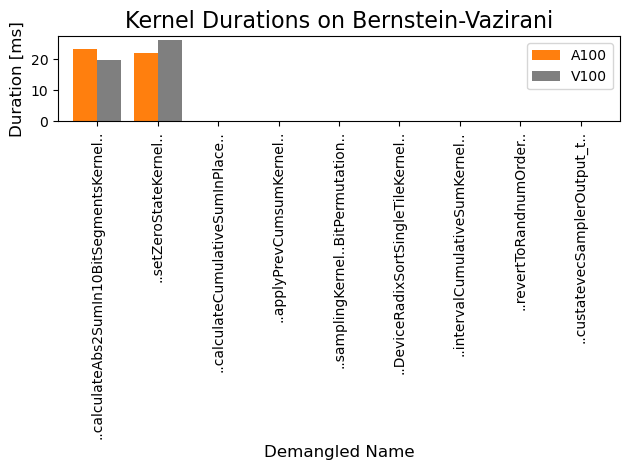

In [3]:
# Load both CSVs
bv30_a100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/bv30_a100.csv")
bv30_v100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/bv30_v100.csv")

# Select relevant columns: Function Name, Demangled Name, and Duration
bv30_a100 = bv30_a100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'A100'})
bv30_v100 = bv30_v100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'V100'})

# Merge on Demangled Name
merged = pd.merge(bv30_a100, bv30_v100, on="Demangled Name", suffixes=('_a100', '_v100'))

# Filter rows where either Duration a100 or Duration v100 is greater than 0

# Save merged table
merged.to_csv("bv_nsight_results.csv", index=False)

# Plotting
plt.figure(figsize=(12, 8))  # Set figure size

# Create a bar plot
colors = ['#ff7f0e', '#7f7f7f']
merged.set_index('Demangled Name')[['A100', 'V100']].plot(kind='bar', width=0.8, color=colors)

# Add labels and title
plt.title('Kernel Durations on Bernstein-Vazirani', fontsize=16)
plt.xlabel('Demangled Name', fontsize=12)
plt.ylabel('Duration [ms]', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<Figure size 1200x800 with 0 Axes>

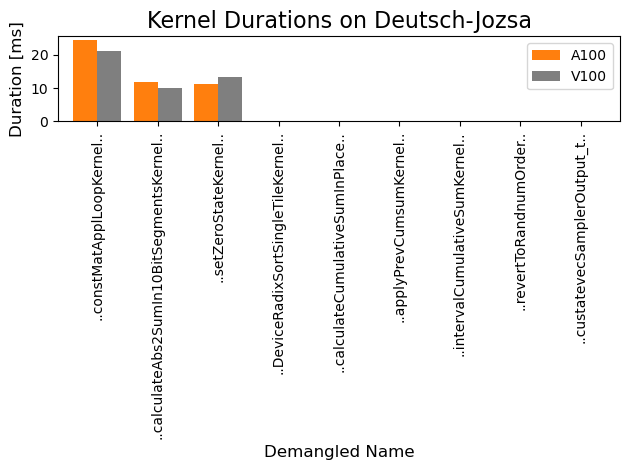

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
dj30_a100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/dj30_a100.csv")
dj30_v100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/dj30_v100.csv")

# Select relevant columns: Function Name, Demangled Name, and Duration
dj30_a100 = dj30_a100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'A100'})
dj30_v100 = dj30_v100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'V100'})

# Merge on Demangled Name
merged = pd.merge(dj30_a100, dj30_v100, on="Demangled Name", suffixes=('_a100', '_v100'))

# Save merged table
merged.to_csv("dj_nsight_results.csv", index=False)

# Plotting
plt.figure(figsize=(12, 8))  # Set figure size

# Create a bar plot
colors = ['#ff7f0e', '#7f7f7f']  # Orange for A100, Grey for V100
merged.set_index('Demangled Name')[['A100', 'V100']].plot(kind='bar', width=0.8, color=colors)

# Add labels and title
plt.title('Kernel Durations on Deutsch-Jozsa', fontsize=16)
plt.xlabel('Demangled Name', fontsize=12)
plt.ylabel('Duration [ms]', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<Figure size 1200x800 with 0 Axes>

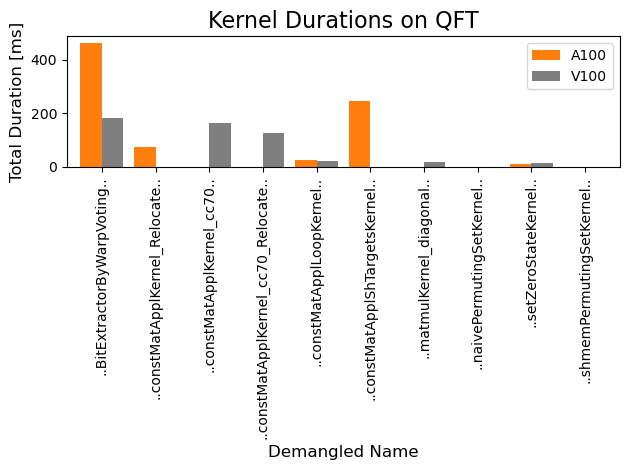

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
qft30_a100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/qft_a100.csv")
qft30_v100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/qft_v100.csv")

# Select and rename relevant columns
qft30_a100 = qft30_a100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'A100'})
qft30_v100 = qft30_v100[['Demangled Name', 'Duration [ms]']].rename(columns={'Duration [ms]': 'V100'})

# Group by Demangled Name and sum durations
qft30_a100_grouped = qft30_a100.groupby('Demangled Name', as_index=False).sum()
qft30_v100_grouped = qft30_v100.groupby('Demangled Name', as_index=False).sum()

# Merge the grouped data
merged = pd.merge(qft30_a100_grouped, qft30_v100_grouped, on="Demangled Name", how="outer").fillna(0)

# Save merged table
colors = ['#ff7f0e', '#7f7f7f']
merged.to_csv("qft_nsight_table.csv", index=False)

# Plotting
plt.figure(figsize=(12, 8))
merged.set_index('Demangled Name')[['A100', 'V100']].plot(kind='bar', width=0.8, color=colors)

# Labels and formatting
plt.title('Kernel Durations on QFT', fontsize=16)
plt.xlabel('Demangled Name', fontsize=12)
plt.ylabel('Total Duration [ms]', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

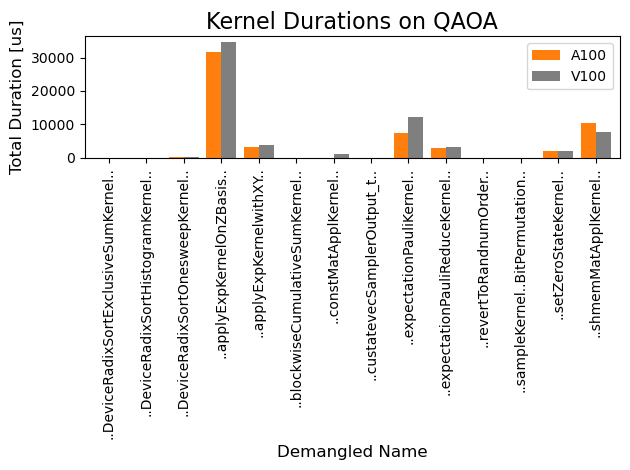

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
qaoa5_a100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/qaoa5_a100.csv")
qaoa5_v100 = pd.read_csv("/scratch/network/er4138/iw/Nsight/qaoa5_v100.csv")

# Select and rename relevant columns
qaoa5_a100 = qaoa5_a100[['Demangled Name', 'Duration [us]']].rename(columns={'Duration [us]': 'A100'})
qaoa5_v100 = qaoa5_v100[['Demangled Name', 'Duration [us]']].rename(columns={'Duration [us]': 'V100'})

# Group by Demangled Name and sum durations
qaoa5_a100_grouped = qaoa5_a100.groupby('Demangled Name', as_index=False).sum()
qaoa5_v100_grouped = qaoa5_v100.groupby('Demangled Name', as_index=False).sum()

# Merge the grouped data
merged = pd.merge(qaoa5_a100_grouped, qaoa5_v100_grouped, on="Demangled Name", how="outer").fillna(0)

# Save merged table
colors = ['#ff7f0e', '#7f7f7f']
merged.to_csv("qaoa_nsight_table.csv", index=False)

# Plotting
plt.figure(figsize=(12, 8))
merged.set_index('Demangled Name')[['A100', 'V100']].plot(kind='bar', width=0.8, color=colors)

# Labels and formatting
plt.title('Kernel Durations on QAOA', fontsize=16)
plt.xlabel('Demangled Name', fontsize=12)
plt.ylabel('Total Duration [us]', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
